In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
IMG_SIZE = 96
x_train_resized = tf.image.resize(x_train, (IMG_SIZE, IMG_SIZE))
x_test_resized = tf.image.resize(x_test, (IMG_SIZE, IMG_SIZE))

In [ ]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [ ]:
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                         include_top=False,
                         weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:

base_model.trainable = False

In [ ]:
model = models.Sequential([
    data_augmentation,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(x_train_resized, y_train_cat,
                    validation_split=0.2,
                    epochs=5, batch_size=64)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 420s 661ms/step - accuracy: 0.4408 - loss: 1.6131 - val_accuracy: 0.7134 - val_loss: 0.8263
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 442s 661ms/step - accuracy: 0.5926 - loss: 1.1587 - val_accuracy: 0.7384 - val_loss: 0.7726
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 397s 635ms/step - accuracy: 0.6196 - loss: 1.0913 - val_accuracy: 0.7395 - val_loss: 0.7682
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 416s 593ms/step - accuracy: 0.6362 - loss: 1.0482 - val_accuracy: 0.7524 - val_loss: 0.7293
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 403s 627ms/step - accuracy: 0.6416 - loss: 1.0461 - val_accuracy: 0.7551 - val_loss: 0.7140


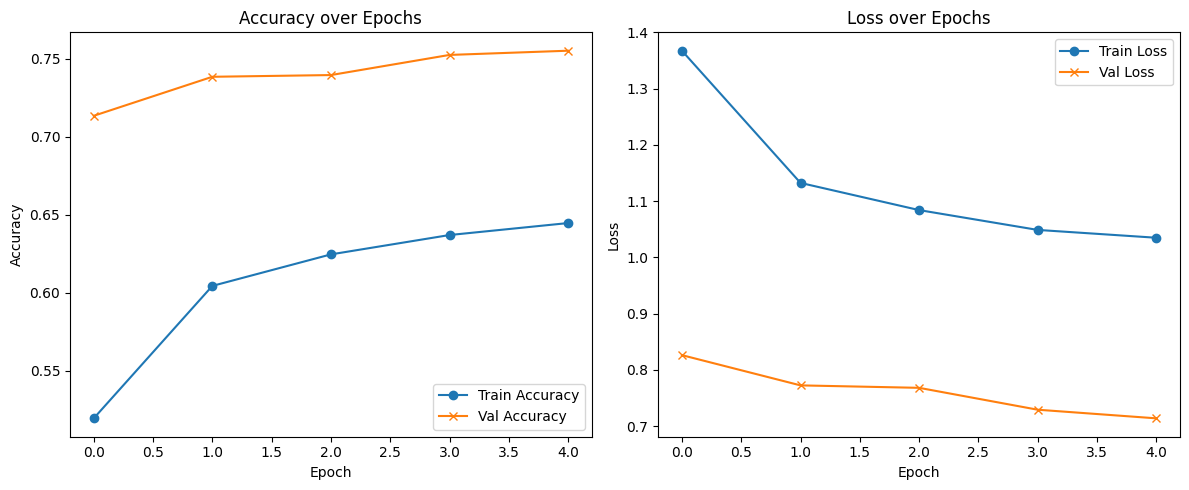

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='x')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='x')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
loss, acc = model.evaluate(x_test_resized, y_test_cat)
print(f"\n✅ Test Accuracy: {acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 185ms/step - accuracy: 0.7616 - loss: 0.7075

✅ Test Accuracy: 0.7610


In [ ]:
y_pred_probs = model.predict(x_test_resized)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 202ms/step


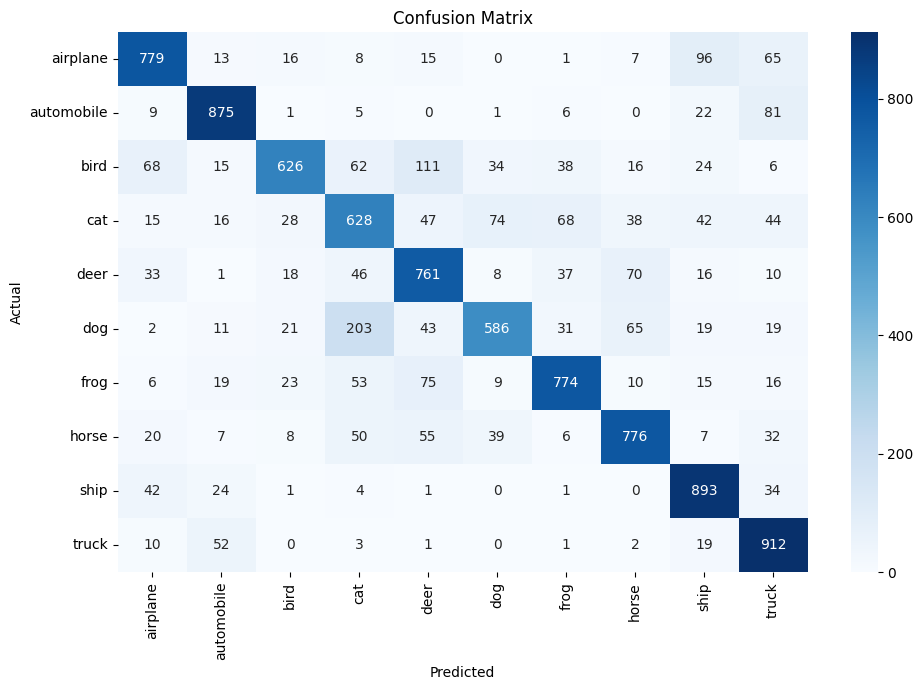

In [ ]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (64, 96, 96, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_96             │ (64, 3, 3, 1280)       │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (64, 1280)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (64, 128)              │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (64, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (64, 10)               │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,753,760 (10.50 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 330,518 (1.26 MB)

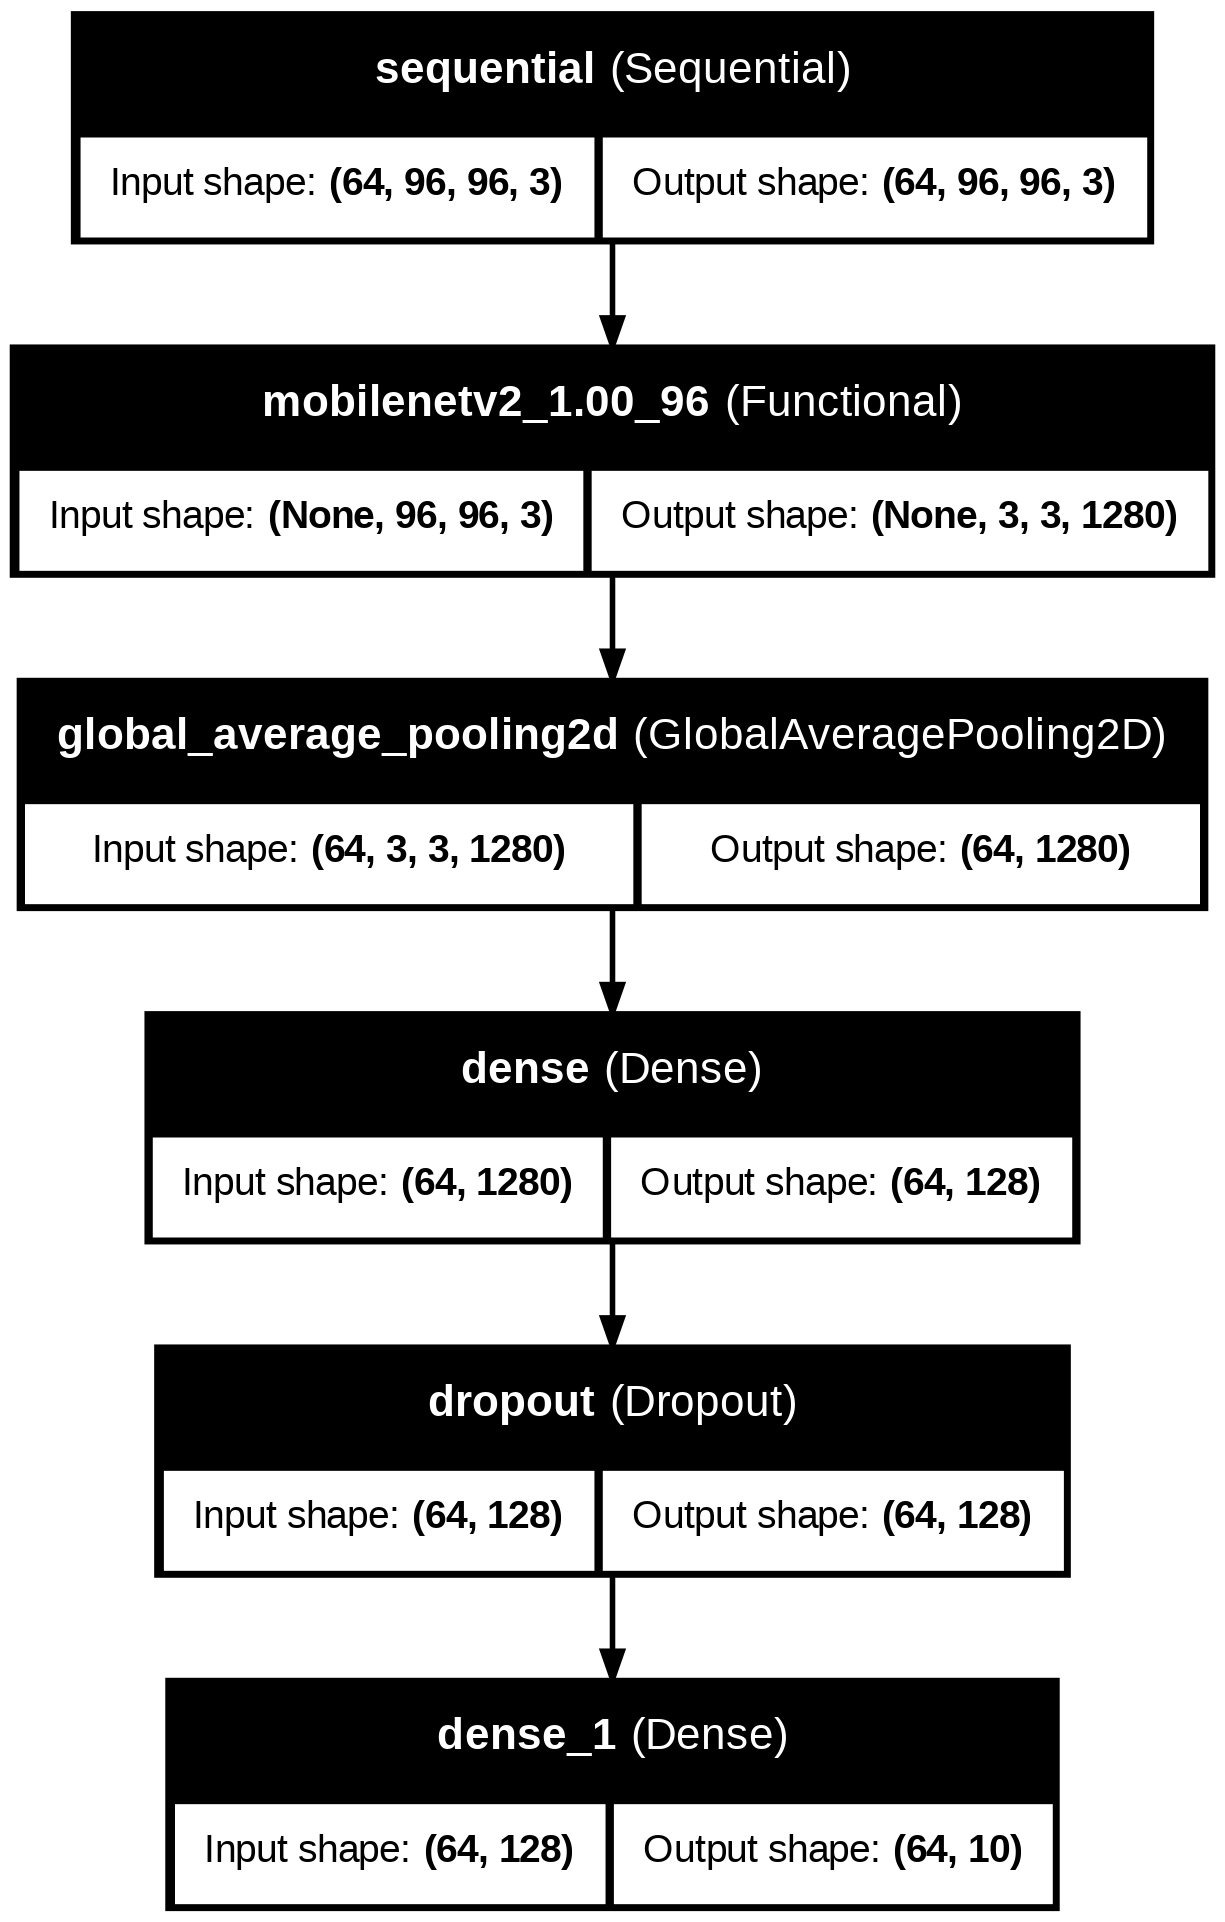

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cifar10_transfer_model.png', show_shapes=True, show_layer_names=True)

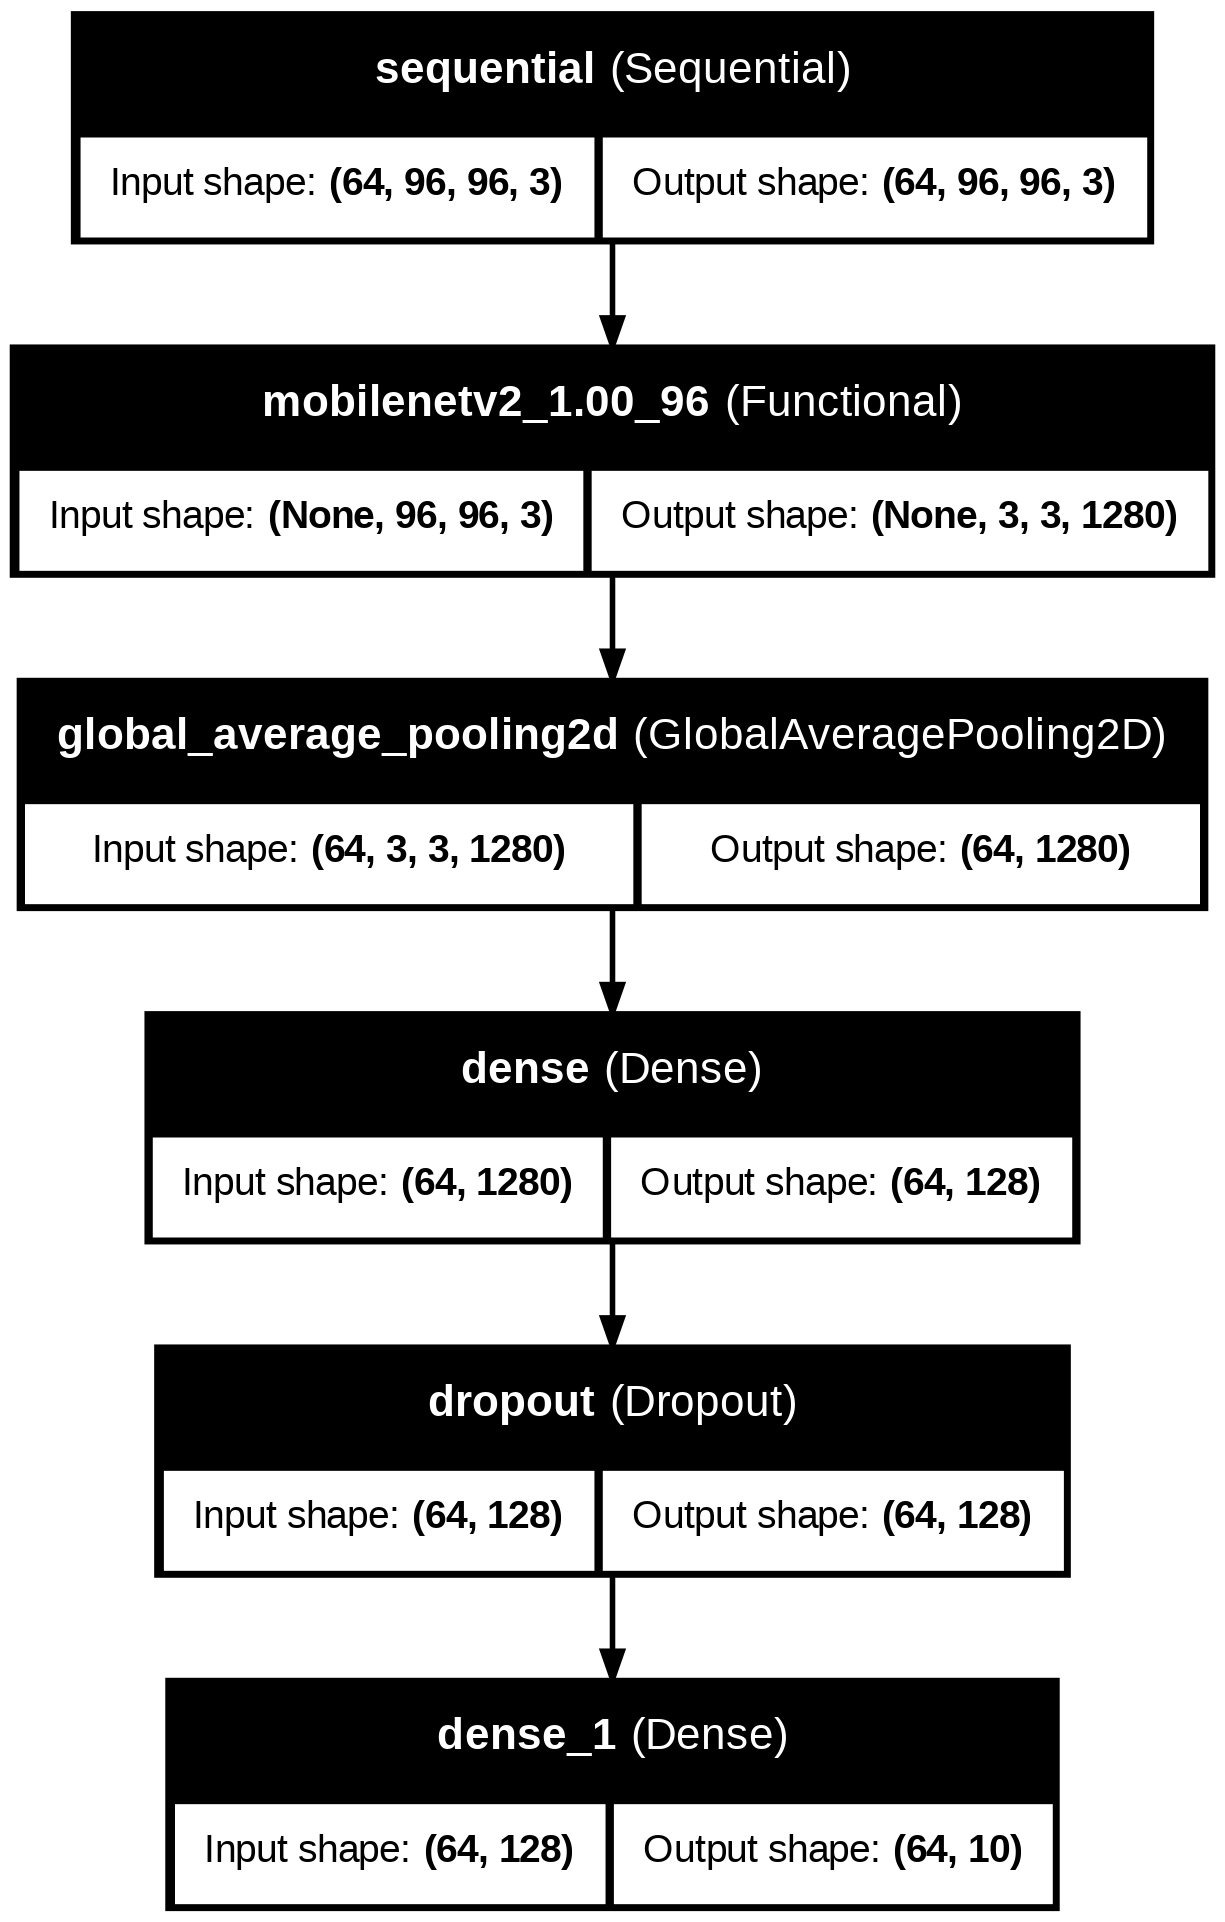

In [ ]:
from IPython.display import Image
Image(filename='cifar10_transfer_model.png')

In [ ]:
model.save("cifar10_transfer_model.h5")
print("✅ Model saved as cifar10_transfer_model.h5")

✅ Model saved as cifar10_transfer_model.h5


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model("cifar10_transfer_model.h5")
print("✅ Model loaded successfully.")


✅ Model loaded successfully.


313/313 ━━━━━━━━━━━━━━━━━━━━ 62s 192ms/step


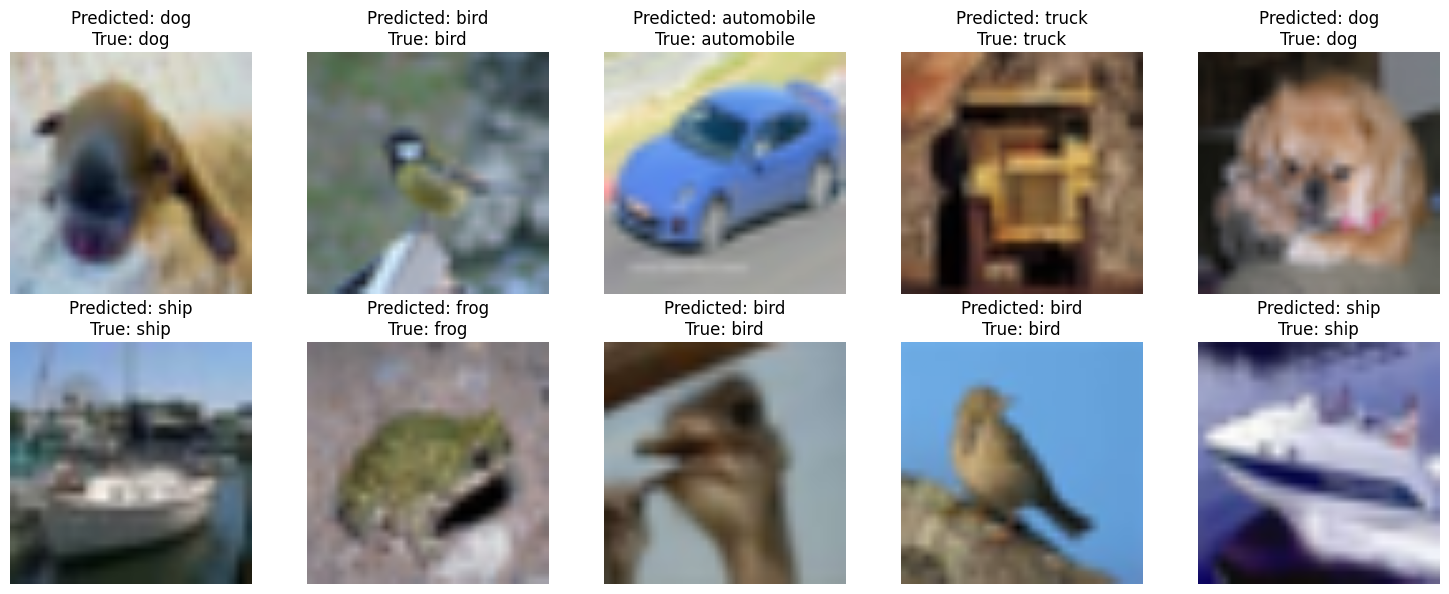

In [ ]:
predictions = loaded_model.predict(x_test_resized)
predicted_classes = np.argmax(predictions, axis=1)


import matplotlib.pyplot as plt
import random

plt.figure(figsize=(15, 6))
for i in range(10):
    index = random.randint(0, len(x_test_resized)-1)
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test_resized[index].numpy())
    plt.title(f"Predicted: {class_labels[predicted_classes[index]]}\nTrue: {class_labels[y_test[index][0]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
test_class_counts = dict(zip(class_labels, np.bincount(y_test.flatten())))

In [ ]:
train_class_counts = dict(zip(class_labels, np.bincount(y_train.flatten())))

In [ ]:
print("Number of training images:", sum(train_class_counts.values()))
print("Number of test images:", sum(test_class_counts.values()))
print("Number of class labels:", len(train_class_counts))
print("Class labels:", list(train_class_counts.keys()))

Number of training images: 50000
Number of test images: 10000
Number of class labels: 10
Class labels: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


<ipython-input-34-04d73d9c5932>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(train_class_counts.keys()), y=list(train_class_counts.values()), palette='viridis')


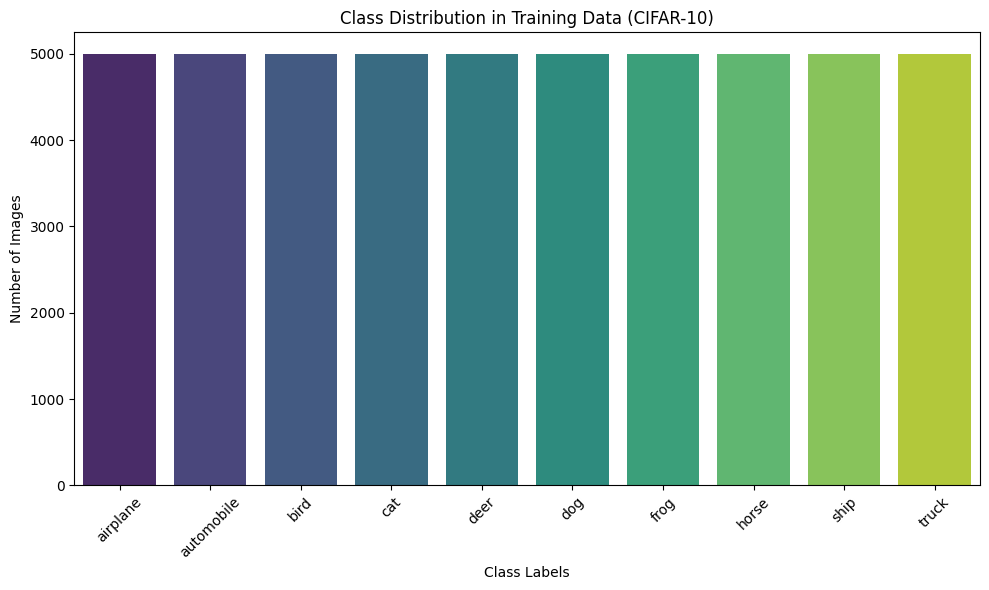

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(train_class_counts.keys()), y=list(train_class_counts.values()), palette='viridis')
plt.title("Class Distribution in Training Data (CIFAR-10)")
plt.xlabel("Class Labels")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
print("\n📊 CIFAR-10 Dataset Summary")
print("-" * 40)
print(f"Number of training images: {sum(train_class_counts.values())}")
print(f"Number of test images    : {sum(test_class_counts.values())}")
print(f"Number of class labels   : {len(train_class_counts)}")
print(f"Class labels             : {', '.join(train_class_counts.keys())}")
print("-" * 40)



📊 CIFAR-10 Dataset Summary
----------------------------------------
Number of training images: 50000
Number of test images    : 10000
Number of class labels   : 10
Class labels             : airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
----------------------------------------
